In [17]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
% matplotlib notebook

In [18]:
# User should download a csv prior to running this notebook.
# The csv files are found at following adress :https://opentransportdata.swiss/dataset/istdaten
# They are updated every day and have following naming convention : 
#  - 2019-08-22istdaten.csv
#  - 2019-08-23istdaten.csv 
#  - ...
# The csv file contain data about all the stops of all public transport of Switzerland for a given date.
data_raw = pd.read_csv('data/2019-08-22istdaten.csv', sep=';')

/Users/Christouf/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (6,7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [19]:
# Keep columns that add value
data_all = data_raw[['BETRIEBSTAG', # operation day
 'BETREIBER_ABK', # operator name
 'PRODUKT_ID', # product
 'LINIEN_TEXT', # type of transport line
 'UMLAUF_ID', 
 'VERKEHRSMITTEL_TEXT', # type of transportation
 'ZUSATZFAHRT_TF',
 'FAELLT_AUS_TF', # canceled
 'HALTESTELLEN_NAME', # train station name
 'ANKUNFTSZEIT', # arrival time
 'AN_PROGNOSE', # arrival time forecasted
 'AN_PROGNOSE_STATUS',# arrival time forecasted status
 'ABFAHRTSZEIT', # departure time
 'AB_PROGNOSE', # departure time forecasted
 'AB_PROGNOSE_STATUS', # departure time forecasted status
 'DURCHFAHRT_TF']]

In [20]:
# Look at data integrity
data_all.count()

BETRIEBSTAG            1674093
BETREIBER_ABK          1674093
PRODUKT_ID             1651417
LINIEN_TEXT            1674093
UMLAUF_ID               987735
VERKEHRSMITTEL_TEXT    1171879
ZUSATZFAHRT_TF         1674093
FAELLT_AUS_TF          1674093
HALTESTELLEN_NAME      1654722
ANKUNFTSZEIT           1572579
AN_PROGNOSE            1548332
AN_PROGNOSE_STATUS     1674093
ABFAHRTSZEIT           1573931
AB_PROGNOSE            1549673
AB_PROGNOSE_STATUS     1674093
DURCHFAHRT_TF          1674093
dtype: int64

In [21]:
data_all['PRODUKT_ID'].value_counts()

Bus       1052094
Tram       228596
BUS        208119
Zug        157854
Metro        4301
Schiff        453
Name: PRODUKT_ID, dtype: int64

<IPython.core.display.Javascript object>


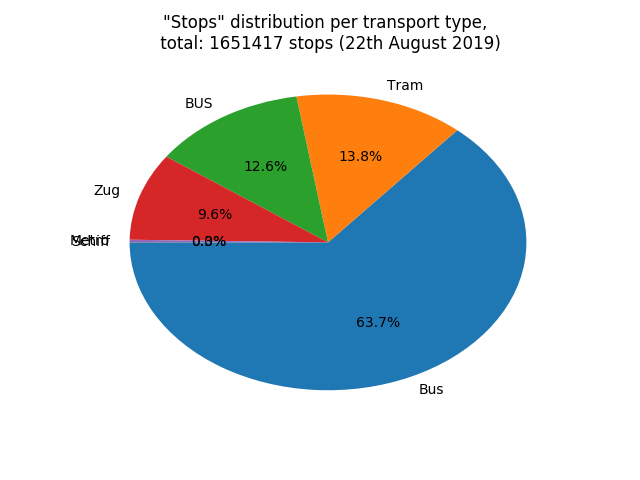

In [22]:
plt.figure()
total = sum(data_all['PRODUKT_ID'].value_counts())
#data_all['PRODUKT_ID'].value_counts().plot(kind='pie', legend=True)
data_all['PRODUKT_ID'].value_counts().plot(kind='pie',y = data_all['PRODUKT_ID'].value_counts().values, legend=False, 
                                           autopct='%1.1f%%',startangle=180, shadow=False, label='',
                                           title='"Stops" distribution per transport type, \n total: ' +str(total)+' stops (22th August 2019)')
# Keep only train information
data = data_all[data_all['PRODUKT_ID']=='Zug']

<IPython.core.display.Javascript object>


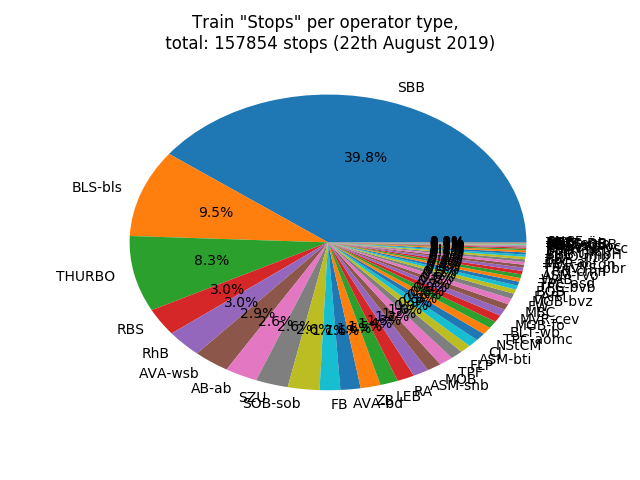

In [23]:
plt.figure()
total2 = sum(data['BETREIBER_ABK'].value_counts())
data['BETREIBER_ABK'].value_counts().plot(kind='pie',y = data['BETREIBER_ABK'].value_counts().values, legend=False, 
                                           autopct='%1.1f%%',startangle=0, shadow=False, label='',
                                           title='Train "Stops" per operator type, \n total: ' +str(total2)+' stops (22th August 2019)')


# Keep only SBB trains
data = data[data['BETREIBER_ABK']=='SBB']

<IPython.core.display.Javascript object>


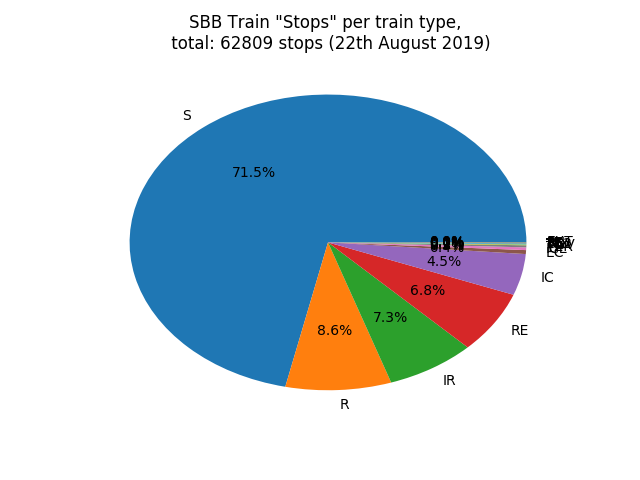

In [24]:
plt.figure()
total3 = sum(data['VERKEHRSMITTEL_TEXT'].value_counts())
data['VERKEHRSMITTEL_TEXT'].value_counts().plot(kind='pie',y = data['VERKEHRSMITTEL_TEXT'].value_counts().values, legend=False, 
                                           autopct='%1.1f%%',startangle=0, shadow=False, label='',
                                           title='SBB Train "Stops" per train type, \n total: ' +str(total3)+' stops (22th August 2019)')


# Keep only train IC, RE and IR
data = data[data['VERKEHRSMITTEL_TEXT'].isin(['IC','RE','IR'])]

In [25]:
data.describe()

,BETRIEBSTAG,BETREIBER_ABK,PRODUKT_ID,LINIEN_TEXT,UMLAUF_ID,VERKEHRSMITTEL_TEXT,ZUSATZFAHRT_TF,FAELLT_AUS_TF,HALTESTELLEN_NAME,ANKUNFTSZEIT,AN_PROGNOSE,AN_PROGNOSE_STATUS,ABFAHRTSZEIT,AB_PROGNOSE,AB_PROGNOSE_STATUS,DURCHFAHRT_TF
count,11671,11671,11671,11671,0.0,11671,11671,11671,11671,10209,9967,11671,10213,9970,11671,11671
unique,1,1,1,25,0.0,3,2,2,199,1255,9298,3,1251,9278,3,1
top,22.08.2019,SBB,Zug,RE,NaN,IR,False,False,Zürich HB,22.08.2019 19:27,22.08.2019 08:33:47,REAL,22.08.2019 21:00,22.08.2019 14:50:00,REAL,False
freq,11671,11671,11671,4273,NaN,4568,11497,11546,712,20,4,9573,22,4,9607,11671


In [26]:
# Create IS_LATE column
data['DELAY_AN'] = pd.to_datetime(data['AN_PROGNOSE']) - pd.to_datetime(data['ANKUNFTSZEIT'])
data['DELAY_AB'] = pd.to_datetime(data['AB_PROGNOSE']) - pd.to_datetime(data['ABFAHRTSZEIT'])

In [27]:
data['DELAY_AB'].describe()

count                      9970
mean     0 days 00:01:57.452457
std      0 days 00:02:31.439084
min           -1 days +23:58:27
25%             0 days 00:00:52
50%             0 days 00:01:19
75%             0 days 00:02:20
max             0 days 02:19:51
Name: DELAY_AB, dtype: object

In [28]:
# 
data['DELAY_AN'][data['DELAY_AN']<dt.timedelta(days=0)] = dt.timedelta(days=0)

/Users/Christouf/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [29]:
#
data['AN_PROGNOSE_STATUS'][data['ANKUNFTSZEIT'].notnull()].value_counts()

REAL         9573
PROGNOSE      626
UNBEKANNT      10
Name: AN_PROGNOSE_STATUS, dtype: int64

In [30]:
data[(data['AN_PROGNOSE_STATUS']=='PROGNOSE') & data['ANKUNFTSZEIT'].notnull()]

,BETRIEBSTAG,BETREIBER_ABK,PRODUKT_ID,LINIEN_TEXT,UMLAUF_ID,VERKEHRSMITTEL_TEXT,ZUSATZFAHRT_TF,FAELLT_AUS_TF,HALTESTELLEN_NAME,ANKUNFTSZEIT,AN_PROGNOSE,AN_PROGNOSE_STATUS,ABFAHRTSZEIT,AB_PROGNOSE,AB_PROGNOSE_STATUS,DURCHFAHRT_TF,DELAY_AN,DELAY_AB
2967,22.08.2019,SBB,Zug,IC2,NaN,IC,False,False,Bellinzona,22.08.2019 09:57,22.08.2019 09:55:14,PROGNOSE,22.08.2019 09:59,22.08.2019 10:00:03,REAL,False,0:00:00,00:01:03
2972,22.08.2019,SBB,Zug,IC2,NaN,IC,False,False,Bellinzona,22.08.2019 22:57,22.08.2019 22:56:24,PROGNOSE,22.08.2019 22:59,22.08.2019 23:01:55,REAL,False,0:00:00,00:02:55
3868,22.08.2019,SBB,Zug,IR90,NaN,IR,False,False,Leuk,22.08.2019 06:42,22.08.2019 06:41:40,PROGNOSE,22.08.2019 06:43,22.08.2019 06:43:51,REAL,False,0:00:00,00:00:51
4036,22.08.2019,SBB,Zug,IR90,NaN,IR,False,False,Leuk,22.08.2019 08:42,22.08.2019 08:41:41,PROGNOSE,22.08.2019 08:43,22.08.2019 08:44:01,REAL,False,0:00:00,00:01:01
4271,22.08.2019,SBB,Zug,IR90,NaN,IR,False,False,Leuk,22.08.2019 10:42,22.08.2019 10:41:10,PROGNOSE,22.08.2019 10:43,22.08.2019 10:43:43,REAL,False,0:00:00,00:00:43
4419,22.08.2019,SBB,Zug,IR90,NaN,IR,False,False,Leuk,22.08.2019 11:42,22.08.2019 11:41:01,PROGNOSE,22.08.2019 11:43,22.08.2019 11:43:50,REAL,False,0:00:00,00:00:50
4471,22.08.2019,SBB,Zug,IR90,NaN,IR,False,False,Visp,22.08.2019 11:03,22.08.2019 11:02:41,PROGNOSE,22.08.2019 11:06,22.08.2019 11:06:28,REAL,False,0:00:00,00:00:28
4569,22.08.2019,SBB,Zug,IR90,NaN,IR,False,False,Leuk,22.08.2019 12:42,22.08.2019 12:41:41,PROGNOSE,22.08.2019 12:43,22.08.2019 12:43:59,REAL,False,0:00:00,00:00:59
4719,22.08.2019,SBB,Zug,IR90,NaN,IR,False,False,Leuk,22.08.2019 13:42,22.08.2019 13:41:05,PROGNOSE,22.08.2019 13:43,22.08.2019 13:43:47,REAL,False,0:00:00,00:00:47
4774,22.08.2019,SBB,Zug,IR90,NaN,IR,False,False,Leuk,22.08.2019 14:42,22.08.2019 14:41:01,PROGNOSE,22.08.2019 14:43,22.08.2019 14:43:57,REAL,False,0:00:00,00:00:57


In [31]:
data.memory_usage(deep=True).sum()/10e6

1.0421874

In [32]:
data.memory_usage(deep=True)

Index                  421048
BETRIEBSTAG            781957
BETREIBER_ABK          700260
PRODUKT_ID             700260
LINIEN_TEXT            700755
UMLAUF_ID              373472
VERKEHRSMITTEL_TEXT    688589
ZUSATZFAHRT_TF          11671
FAELLT_AUS_TF           11671
HALTESTELLEN_NAME      819657
ANKUNFTSZEIT           792041
AN_PROGNOSE            812020
AN_PROGNOSE_STATUS     720333
ABFAHRTSZEIT           792205
AB_PROGNOSE            812152
AB_PROGNOSE_STATUS     720196
DURCHFAHRT_TF           11671
DELAY_AN               458548
DELAY_AB                93368
dtype: int64